#### Aline Rockenzahn 
#### Lunes 9 Septiembre 2024 (Editado el miércoles 11 Septiembre) 

# <div align ="center"> A06-PROGRAMACIÓN LINEAL

Usa los 5 pasos vistos en clase para plantear adecuadamente el siguiente ejercicio. Después, utiliza linprog para resolverlo. 

**Ejercicio 1** 

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

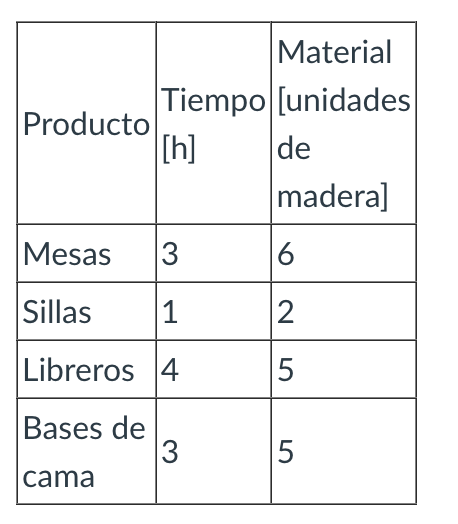

Las mesas se venden en 9000, las sillas en 3000, los libreros en 10000, y las bases de cama en 9000. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?  
¿Cuánto material se usa?  
¿Cuál se el ingreso total si se vende todo lo fabricado?  

1. ¿Qué quiero hacer?
Quiero maximizar la ganancia
2. ¿Sobre qué puedo influir? sobre qué objetos se construyen y sobre quién los construye
3. Crear mi función de costo:
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= 9000m1 + 9000m2 + 3000s1 + 3000s2 + 10000l1 + 10000l2 + 9000b1 + 9000b2$$
4. RESTRICCIONES
$$3m1 + s1 + 4l1 + 3b1 <=40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2<=40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 <=100$$
5. Cuidar que sea un problema de optimización de min
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$
Como las restricciones ya eran "menor o igual que" no hubo necesidad de alterarlas 

Ahora resumiendo todo el problema: 
$$\min_{s1,s2,m1,m2,l1,l2,b1,b2} -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$ 
<div align ="center">s.t.
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$


In [10]:
import scipy.optimize as opt 
import numpy as np 
c= np.array([-9000,
             -9000,
             -3000,
             -3000,
             -10000,
             -10000,
             -9000,
             -9000,
             ])
#m1,m2,s1,s2,l1,l2,b1,b2 
Aub= np.array([
    [ 3,  0,  1,  0,  4,  0,  3,  0],
    [ 0,  4.5,  0,  1.5,  0,  6,  0,  4.5],
    [ 6,  7.2,  2,  2.4,  5,  6,  5,  6],
])

bub= ([
    40,
    40,
    100,
])

sol2=opt.linprog(c,Aub,bub,integrality=1)
sol2 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -176000.0
              x: [ 0.000e+00  0.000e+00  1.000e+00 -9.474e-15  9.000e+00
                   2.000e+00  1.000e+00  6.000e+00]
            nit: -1
          lower:  residual: [ 0.000e+00  0.000e+00  1.000e+00 -9.474e-15
                              9.000e+00  2.000e+00  1.000e+00  6.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  1.000e+00  0.00

In [101]:
#la parte de x representa los valores de tus variables en el mismo orden en que las pusiste
#Para llamarlo es con sol.x 

#Para conocer el valor de tus restricciones debes multiplicar la matriz Aub por la matriz de soluciones x 
#Multi de matrices es con @ 

In [99]:
Aub @ sol2.x #No deberían salir sólo 3 resultados? pq salen 5? checa eso 

array([ 40.,  39., 100.,   0.,  -1.])

interpretando los resultados de arriba: 

**Para maximizar su ganancia, a la carpintería local le conviene construir durante una semana:**   
0 mesas del carpintero experto  
0 mesas del carpinter aprendíz  
1 silla del carpintero experto  
-9.474e-15 sillas del carpintero aprendíz (whatttt como que sillas negativas...checa cómo se interpreta esto)   
9 libreros del carpintero experto   
2 libreros del carpintero aprendíz   
1 base de cama del carpintero experto   
6 bases de cama del carpintero aprendíz   
**El carpintero experto trabaja** 40 horas   
**El carpintero aprendíz trabaja** 39 horas   
**Se usa el 100% del material**   
**La ganancia total** es de 176,000   



**Ejercicio 2**


La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

¿Se puede cumplir la orden?  
Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?  
¿Cuántas horas trabaja cada quién?  
¿Cuánto material se usa?  
¿Cuál es el nuevo ingreso total?  


1. ¿Qué quiero hacer?
Nuevamente quiero maximizar la ganancia
2. ¿Sobre qué puedo influir? sobre qué objetos se construyen y sobre quién los construye cumpliendo el mínimo de la orden de 3 mesas y 18 sillas. 
3. Crear mi función de costo:
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= 9000m1 + 9000m2 + 3000s1 + 3000s2 + 10000l1 + 10000l2 + 9000b1 + 9000b2$$
4. RESTRICCIONES
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$
No puedo especificar de una la cantidad de mesas como 3 y la cantidad de sillas como 18 porque puede que para maximizar el resto del material, convenga construir más de esos objetos. Por lo que la cantidad de mesas y sillas deben seguir siendo variables. Entonces puedo poner estos nuevos datos como otras restricciones para asegurarse de que al menos el mínimo de mesas y sillas se cumpla:
$$m1 + m2 \geq 3$$
$$s1 + s2 \geq 18$$ 
6. Cuidar que sea un problema de optimización de min
$$f(s1,s2,m1,m2,l1,l2,b1,b2)= -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$
En este caso mis últimas 2 restricciones son "mayor o igual que", por lo que debo cambiarlas de signo para hacerlas "menor o igual que":
$$ -m1 - m2 \leq -3 $$
$$ -s1 - s2 \leq -18 $$ 

Ahora resumiendo todo el problema: 
$$\min_{s1,s2,m1,m2,l1,l2,b1,b2} -9000m1 - 9000m2 - 3000s1 - 3000s2 - 10000l1 - 10000l2 - 9000b1 - 9000b2$$ 
<div align ="center">s.t.
$$3m1 + s1 + 4l1 + 3b1 \leq 40$$
$$4.5m2 + 1.5s2 + 6l2 + 4.5b2 \leq 40$$
$$6m1 + 7.2m2 + 2s1 + 2.4s2 + 5l1 + 6l2 + 5b1 + 6b2 \leq 100$$
$$ -m1 - m2 \leq -3 $$
$$ -s1 - s2 \leq -18 $$ 

In [26]:
import scipy.optimize as opt 
import numpy as np 
c= np.array([-9000,
             -9000,
             -3000,
             -3000,
             -10000,
             -10000,
             -9000,
             -9000,
             ])
#m1,m2,s1,s2,l1,l2,b1,b2 
Aub= np.array([
    [ 3,  0,    1,  0,    4,  0,  3,  0],
    [ 0,  4.5,  0,  1.5,  0,  6,  0,  4.5],
    [ 6,  7.2,  2,  2.4,  5,  6,  5,  6],
    [-1, -1,    0,  0,    0,  0,  0,  0],
    [ 0,  0,   -1, -1,    0,  0,  0,  0],
])
#La matriz al parecer después de la última fila tmbn lleva coma afuera de los corchetes 
bub= ([
    40,
    40,
    100,
    -3,
    -18,
])

sol_pedido=opt.linprog(c,Aub,bub,integrality=1)
sol_pedido 


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -161000.0
              x: [ 3.000e+00  0.000e+00  1.800e+01  0.000e+00  3.000e+00
                   5.000e+00  0.000e+00  0.000e+00]
            nit: -1
          lower:  residual: [ 3.000e+00  0.000e+00  1.800e+01  0.000e+00
                              3.000e+00  5.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.000e+00  1.000e+01  1.00

In [30]:
#Como minimizamos la función, en una gráfica se obersva que una función maximizada está en el mismo punto que minimizada pero con signo opuesto. Por lo que el precio final aquí es el valor pero positivo 
sol_pedido.fun * -1 

161000.0

In [50]:
Aub @ sol_pedido.x 

array([ 39.,  30.,  99.,  -3., -18.])

Interpretando los resultados: 
Sí se puede cumplir la orden  
Se deben construir: 
3 mesas del carpintero experto  
0 mesas del carpinter aprendíz  
18 silla del carpintero experto  
0 sillas del carpintero aprendíz 
3 libreros del carpintero experto   
5 libreros del carpintero aprendíz   
0 bases de cama del carpintero experto   
0 bases de cama del carpintero aprendíz   
**El carpintero experto trabaja** 39 horas   
**El carpintero aprendíz trabaja** 30 horas   
**Se usa el 99% del material**   
**La ganancia total** es de 161,000   